In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sns.set_theme(style = 'darkgrid')

auto = pd.read_csv('Auto.csv')
df = auto.copy()
df = df.loc[df['horsepower']!='?']
temp = pd.to_numeric(df['horsepower'])
df['horsepower'] = temp

In [2]:
#a) Première approche
reg = lm.LinearRegression()
X = np.reshape(df.horsepower.tolist(), (-1,1))
y = df.mpg.tolist()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)
print(reg.predict([[98]]))

[-0.15784473]
39.93586102117047
[24.46707715]


In [3]:
#Deuxième approche
lm_fit = smf.ols(data=df, formula='mpg~horsepower').fit()
print(lm_fit.summary())
_, iv_l, iv_u = wls_prediction_std(lm_fit)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           7.03e-81
Time:                        10:22:35   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'mpg')

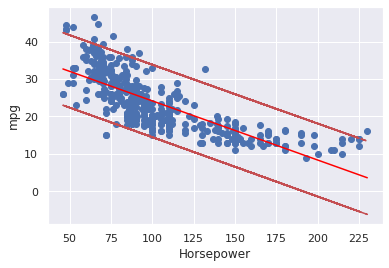

In [9]:
#b)
plt.scatter(df.horsepower, df.mpg)
plt.plot(df.horsepower, iv_u, 'r--')
plt.plot(df.horsepower, iv_l, 'r--')
X_ = pd.DataFrame({'horsepower': [df.horsepower.min(), df.horsepower.max()]})
y_pred_ = lm_fit.predict(X_)
y_pred = reg.predict(X)
plt.plot(X_, y_pred_, c='red')
plt.xlabel('Horsepower')
plt.ylabel('mpg')

Text(0, 0.5, 'ŷ')

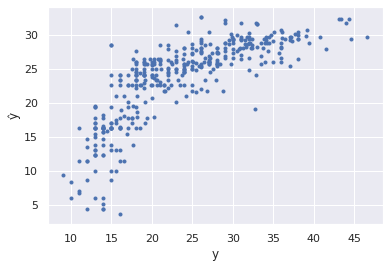

In [12]:
#c)
plt.plot(y, y_pred, '.')
plt.xlabel('y')
plt.ylabel('ŷ')